In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
rat_df=pd.read_csv("title_ratings.csv")
bas_df=pd.read_csv("title_basics_2018.csv")

In [5]:
import os
os.getcwd()

'C:\\Users\\ameli'

In [12]:
rat_df.describe()

,averageRating,numVotes
count,985459.000000,9.854590e+05
mean,6.886208,9.577535e+02
std,1.401076,1.565533e+04
min,1.000000,5.000000e+00
25%,6.100000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.600000e+01
max,10.000000,2.151694e+06


In [7]:
print('size of 2018 data : ',len(bas_df), 'size of all data :',len(rat_df))

size of 2018 data :  12815 size of all data : 985459


In [10]:
duplicate_rat_df = rat_df[rat_df.duplicated(['tconst'])]
print("Duplicate Rows of 2018 data except first occurrence based on all columns are :", duplicate_rat_df)

Duplicate Rows of 2018 data except first occurrence based on all columns are : Empty DataFrame
Columns: [tconst, averageRating, numVotes]
Index: []


In [11]:
duplicate_bas_df=bas_df[bas_df.duplicated(['tconst'])]
print("Duplicate Rows of all data except first occurrence based on all columns are :", duplicate_bas_df)

Duplicate Rows of all data except first occurrence based on all columns are : Empty DataFrame
Columns: [tconst, primaryTitle, originalTitle, year, runtimeMinutes, genres]
Index: []


In [13]:
bas_df.describe()

,year,runtimeMinutes
count,12815.0,12815.000000
mean,2018.0,87.887163
std,0.0,33.998296
min,2018.0,1.000000
25%,2018.0,73.000000
50%,2018.0,89.000000
75%,2018.0,101.000000
max,2018.0,1320.000000


In [77]:
rat_df.groupby(['tconst']).size().reset_index(name='count').sort_values(by=['count'],ascending=True);

In [16]:
bas_df.groupby(['tconst']).size().reset_index(name='count').sort_values(by=['count'],ascending=True);

In [78]:
bas_df.groupby(['genres']).count().reset_index().sort_values(by=['tconst']);

In [17]:
len(bas_df[bas_df['genres']=='Comedy'])

800

In [18]:
len(bas_df[bas_df['genres'].str.contains('Com')])

2233

In [19]:
2233-800

1433

In [113]:
sr=pd.Series(bas_df['genres'])

In [126]:
all_com=sr.str.contains(pat='Com')

In [21]:
movie2018_df=pd.merge(bas_df,rat_df,how='left', on='tconst')
movie2018_df=movie2018_df.fillna(0)

In [22]:
movie2018_df.head()

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4937.0
1,tt0111414,A Thin Life,A Thin Life,2018,75,Comedy,0.0,0.0
2,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60,Documentary,7.5,6.0
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104,Drama,3.9,74.0
4,tt0253093,Gangavataran,Gangavataran,2018,134,\N,6.6,8.0


In [23]:
len(movie2018_df[movie2018_df['averageRating']>=8])

780

In [79]:
movie2018_df.sort_values(['numVotes','averageRating'],ascending=False);

In [80]:
movie2018_df.sort_values(['averageRating'],ascending=False);

In [26]:
best_movie=movie2018_df.groupby(['tconst','averageRating']).agg({'numVotes':sum}).reset_index()

In [81]:
best_movie.sort_values(['numVotes','averageRating'],ascending=False);

In [28]:
best_movie.loc[best_movie['numVotes'].idxmax()] 

tconst           tt4154756
averageRating          8.5
numVotes            719146
Name: 1386, dtype: object

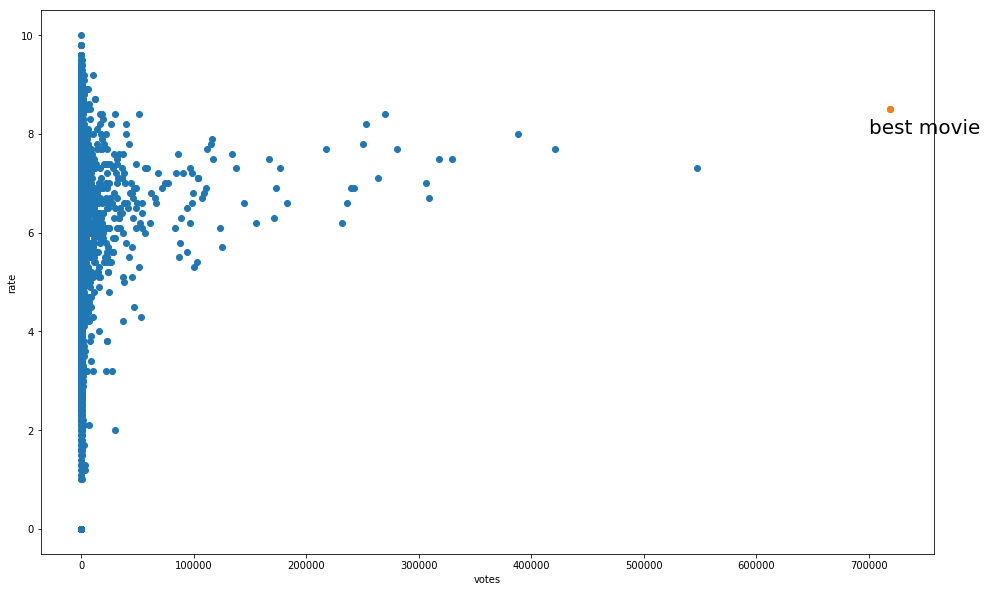

In [29]:
fig = plt.figure(facecolor='w',figsize=(16,10))
ax = fig.add_subplot(1,1,1)
movie_rate=best_movie.iloc[:,1]
movie_vote=best_movie.iloc[:,2]

ax.scatter(movie_vote,movie_rate)
ax.scatter(719146,8.5)
plt.text(700000,8,'best movie',fontsize=20)
plt.xlabel('votes')
plt.ylabel('rate')
plt.show()

In [73]:
rate_vote=movie2018_df.groupby(['averageRating']).agg({'numVotes':sum}).reset_index()

In [72]:
rate_vote.corr()

,averageRating,numVotes
averageRating,1.000000,0.335156
numVotes,0.335156,1.000000


In [32]:
x0=rate_vote.iloc[:,0]
y0=rate_vote.iloc[:,1]

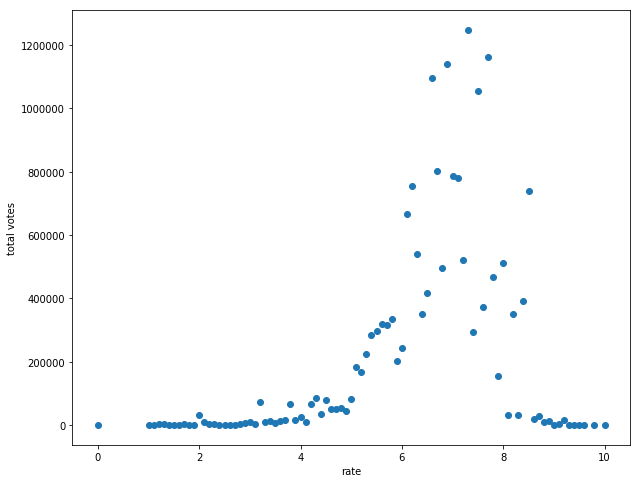

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x0,y0)
plt.xlabel('rate')
plt.ylabel('total votes')
plt.rcParams.update({'font.size': 16})

plt.show()

In [74]:
rate_vote.loc[rate_vote.idxmax()]

,averageRating,numVotes
89,10.0,5.0
64,7.3,1248927.0


In [62]:
plot_data=movie2018_df.groupby(['runtimeMinutes']).agg({'numVotes':"mean"}).reset_index()


In [63]:
x=plot_data.iloc[:,0]
y=plot_data.iloc[:,1]

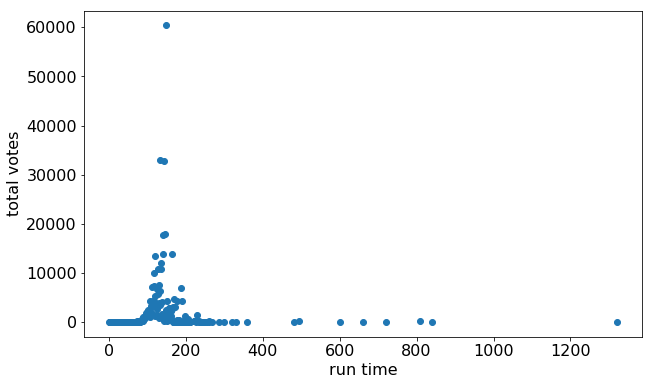

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('run time')
plt.ylabel('total votes')
plt.rcParams.update({'font.size': 16})
plt.show()

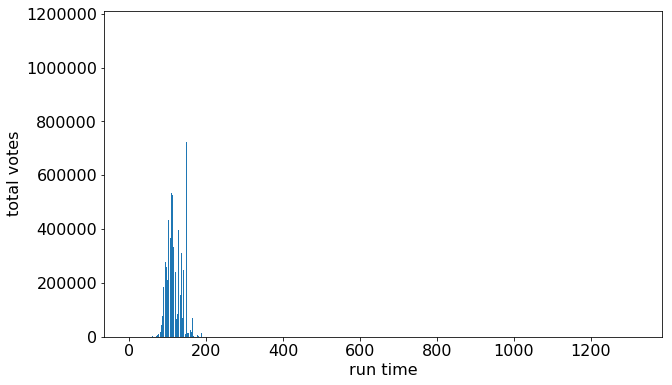

In [294]:
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('run time')
plt.ylabel('total votes')
plt.rcParams.update({'font.size': 16})
plt.show()

In [65]:
plot_data.loc[plot_data.idxmax()]

,runtimeMinutes,numVotes
226,1320,0.000000
148,149,60385.083333


In [53]:
plot_1_data=movie2018_df.groupby(['runtimeMinutes']).agg({'averageRating':'mean'}).reset_index()

In [54]:
x_1=plot_1_data.iloc[:,0]
y_1=plot_1_data.iloc[:,1]

In [44]:
movie2018_df.groupby(['tconst','averageRating'])['numVotes'].max()

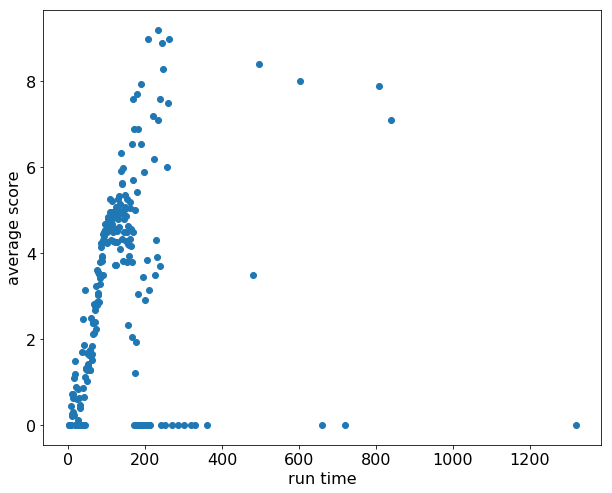

In [56]:

plt.figure(figsize=(10,8))
plt.scatter(x_1,y_1)
plt.xlabel('run time')
plt.ylabel('average score')
plt.rcParams.update({'font.size': 16})
plt.show()

In [57]:
plot_1_data.loc[plot_1_data.idxmax()]

,runtimeMinutes,averageRating
226,1320,0.0
202,233,9.2


In [75]:
plot_1_data.corr()

,runtimeMinutes,averageRating
runtimeMinutes,1.000000,0.239128
averageRating,0.239128,1.000000


In [282]:
plot_1_data[plot_1_data['runtimeMinutes']==134]

,runtimeMinutes,averageRating
133,134,174.5
